# Вычислительная математика - лекция 1
## Введение, Машинная арифметика

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

#### Пример1 - вычисление производной функции

Для приближенного вычисления производной воспользуемся определением:

$$
f'(x) = \lim_{dx \to 0} \frac{f(x + dx) - f(x)}{dx}
$$

<<Уберем>> предел, и будем стараться сделать $dx$ минимальным. Ошибку такого метода вычисления производной можно найти пользуясь формулой Тейлора:

$$
f'(x) \sim \frac{f(x + dx) - f(x)}{dx}  = f'(x) + \frac{1}{2} f''(\eta)dx, \ где \ \eta \in (x, x+dx)
$$

/tmp/ipykernel_26247/1907229614.py:5: RuntimeWarning: divide by zero encountered in divide
  dx = (1e-1 / np.power(2, np.arange(1000))).astype(np.float64)
/tmp/ipykernel_26247/1907229614.py:1: RuntimeWarning: invalid value encountered in sin
  func = lambda x: np.sin(x)


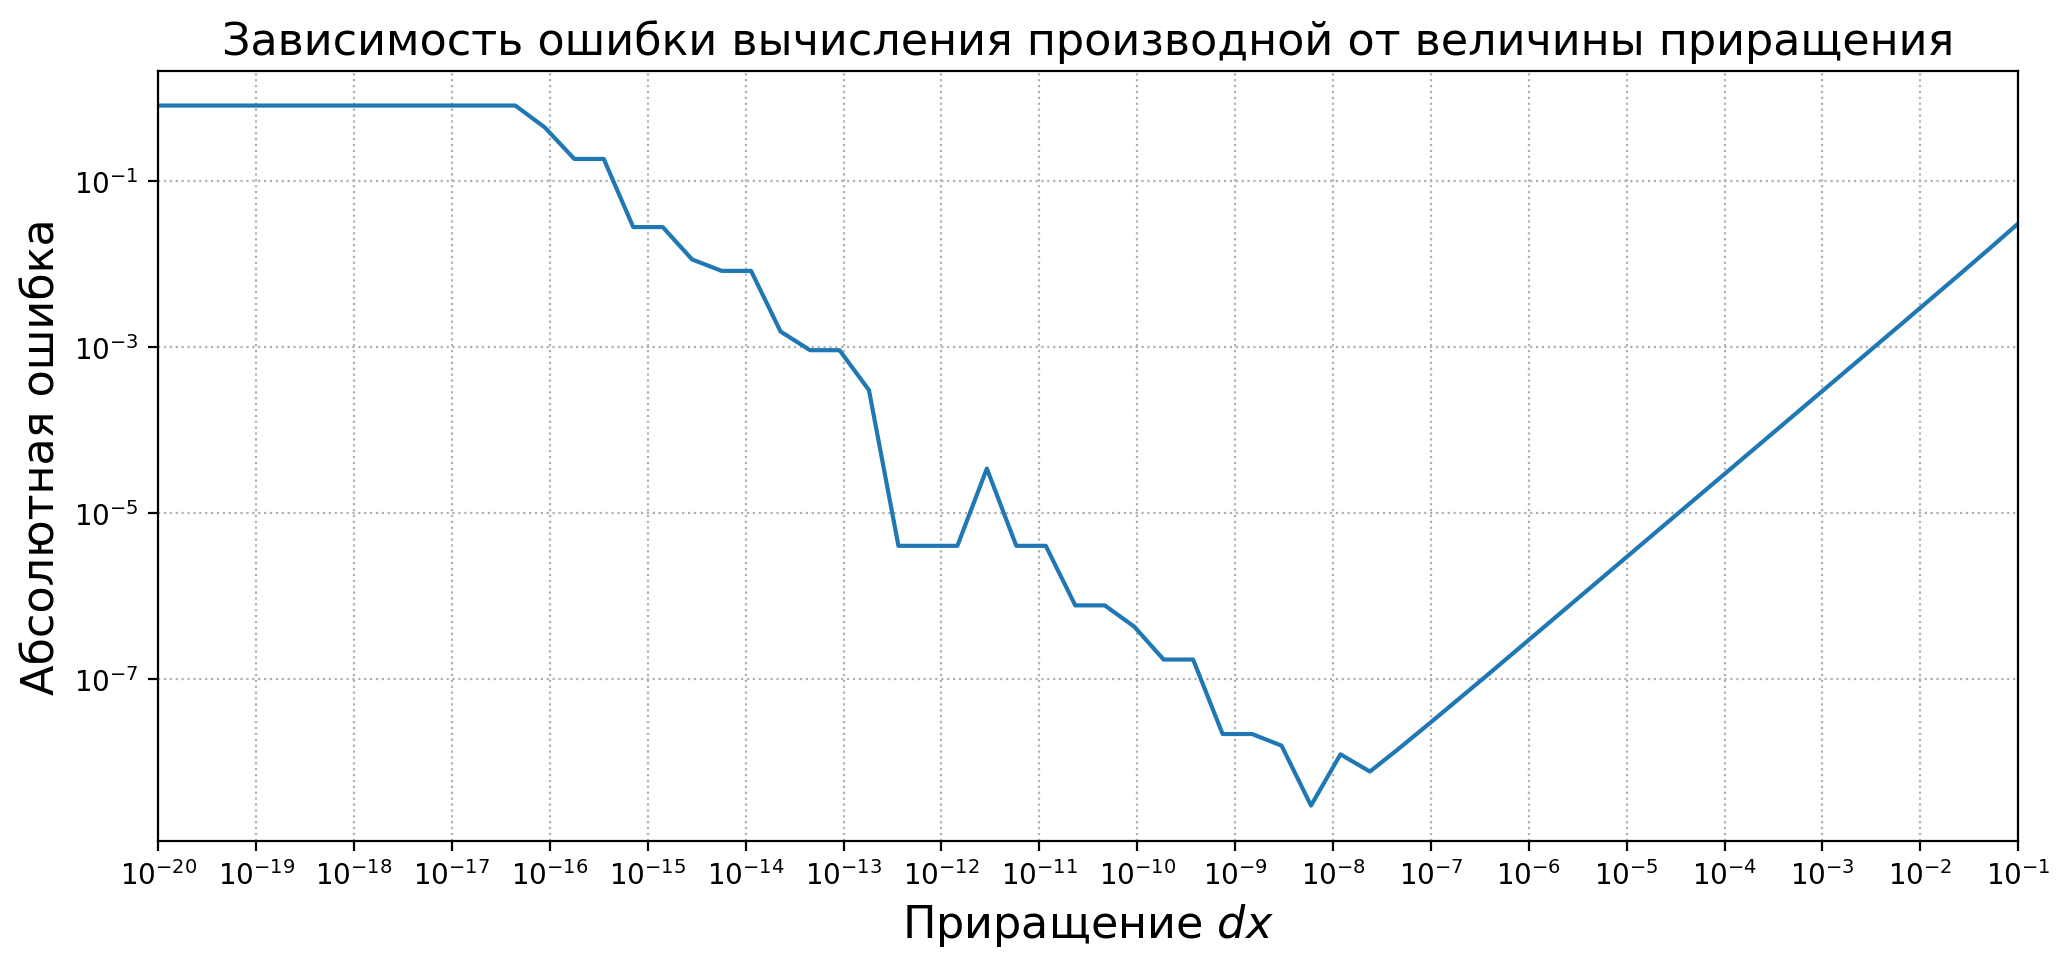

In [2]:
func = lambda x: np.sin(x)
func_deriv = lambda x: np.cos(x)

x0 = np.pi / 5
dx = (1e-1 / np.power(2, np.arange(1000))).astype(np.float64)

func_deriv_approx = (func(x0 + dx) - func(x0)) / dx
approx_error = np.abs(func_deriv_approx - func_deriv(x0))
min_error_ind = np.argmin(approx_error)

plt.figure(figsize = (12, 5), dpi = 200)
plt.loglog(dx, approx_error)

plt.grid(ls = ':')
plt.xlabel('Приращение $dx$', fontsize = 16)
plt.ylabel(r"Абсолютная ошибка", fontsize = 16)
plt.xticks(np.power(0.1, np.arange(21)))
plt.xlim(1e-20, 1e-1)
plt.title("Зависимость ошибки вычисления производной от величины приращения",
          fontsize = 16)

plt.savefig("derivative_example.png")

Как видим, логика <<чем меньше приращение - тем меньше ошибка>> тут не работает. Виной тому - ошибка округления, возникающая при проведении математических операций на компьютере.

#### Пример 2 - плохая матрица

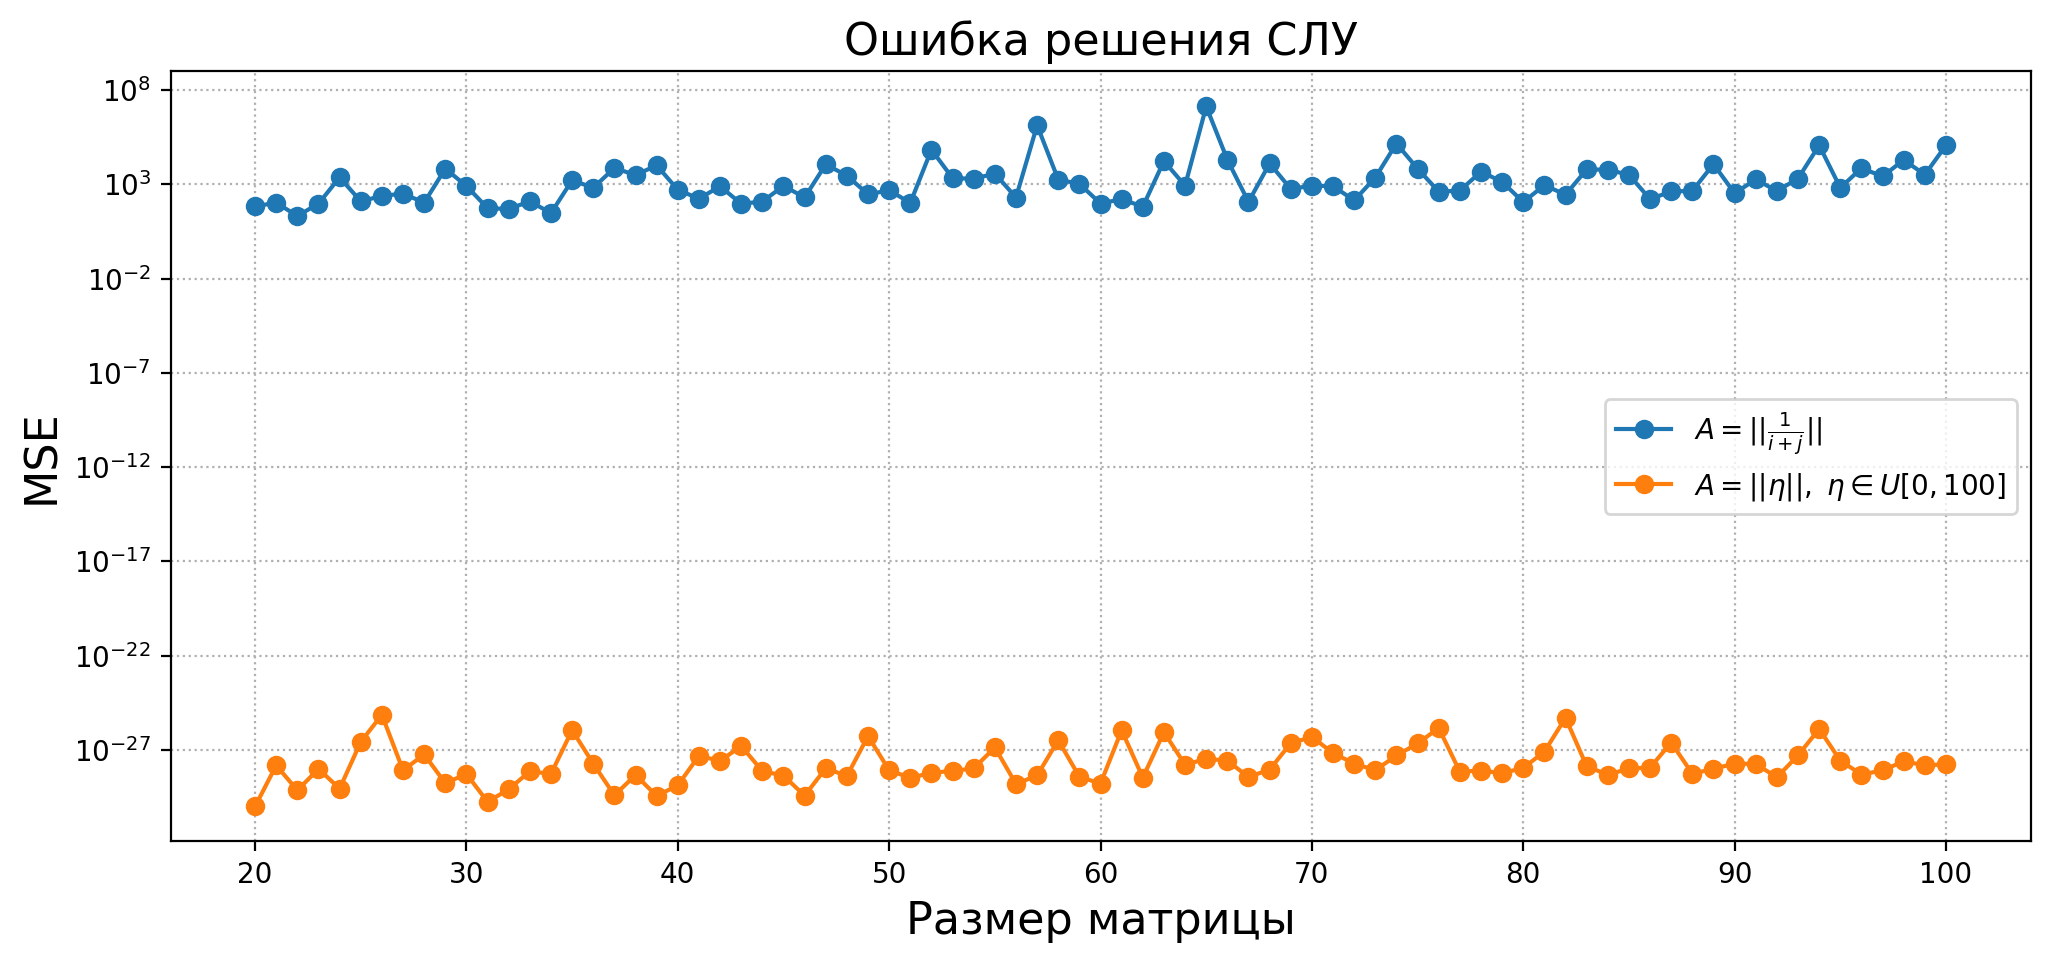

In [3]:
sizes = np.arange(20, 101, 1)
errors_1, errors_2 = [], []

for n in sizes: 
    A_1 = np.array([[1 / (i + j + 1) for i in range(n)] for j in range(n)])
    A_2 = np.random.rand(n, n) * 100
    x_real = np.random.rand(n)
    b_1 = A_1 @ x_real
    b_2 = A_2 @ x_real
    x_sol_1 = np.linalg.solve(A_1, b_1)
    x_sol_2 = np.linalg.solve(A_2, b_2)
    errors_1.append(mean_squared_error(x_real, x_sol_1))
    errors_2.append(mean_squared_error(x_real, x_sol_2))

plt.figure(figsize = (12, 5), dpi = 200)
plt.yscale('log')
plt.plot(sizes, errors_1, 'o-', label = r'$A = ||\frac{1}{i+j}||$')
plt.plot(sizes, errors_2, 'o-', label = r'$A = ||\eta||, \ \eta \in U[0, 100]$')
plt.grid(ls = ':')
plt.xlabel("Размер матрицы", fontsize = 16)
plt.ylabel("MSE", fontsize = 16)
plt.legend()
plt.title(r"Ошибка решения СЛУ",
          fontsize = 16);

Как видим, максимальное значение ошибки - порядка $10^{8}$, что недопустимо много. Ведь исходные величины $x$ (`x_real`) лежат в диапазоне от нуля до единицы. Матрица $A = ||\frac{1}{i+j}||$ в данном случае является **плохо обусловленной**